In [1]:
import  pandas as pd 
import numpy as np
from sklearn.cluster  import KMeans
import matplotlib.pyplot  as plt
from sklearn.preprocessing import scale
from sklearn import cluster
pd.set_option('display.max_columns',None)

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

In [3]:
lujing = r'C:\Users\Administrator\Datas\爱尚花语\艾尚月季度数据\6月份数据\2data\Mdata.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
def ziduan(data,list_ziduan):
    data = data[list_ziduan]
    return data

In [5]:
list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','推单数','有效订单数','下单新客人数','入店转化率','下单转化率','原价交易额','实付交易额','商家补贴金额']

In [6]:
data = ziduan(data,list_ziduan)
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额
0,20200601,20200630,9024275,花韵花艺馆,鲜花组,河南省,郑州,否,20200508,在线,18.0,18.0,1451,42,0,0,0,0,2.89,0%,0.0,0.0,0.0
1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,18362,314,23,23,22,21,1.71,7.32%,4962.0,2596.0,2431.0
2,20200601,20200630,9043306,花之都创意鲜花馆,鲜花组,山东省,潍坊,否,20200508,在线,18.0,18.0,1183,17,0,0,0,0,1.44,0%,0.0,0.0,0.0
3,20200601,20200630,9043308,时初花艺,鲜花组,陕西省,咸阳,否,20200508,在线,18.0,18.0,4894,66,1,1,0,0,1.35,1.52%,0.0,0.0,0.0
4,20200601,20200630,9043310,元寳花店,鲜花组,吉林省,长春,否,20200508,在线,10.0,10.3,3215,44,0,0,0,0,1.37,0%,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,20200601,20200630,9415742,花语轩鲜花,鲜花组,陕西省,宝鸡,是,20200630,在线,15.0,14.4,42,0,0,0,0,0,0.00,0%,0.0,0.0,0.0
115,20200601,20200630,9416497,柳柳花舍,鲜花组,重庆市,重庆,是,20200630,在线,12.0,11.4,61,1,0,0,0,0,1.64,0%,0.0,0.0,0.0
116,20200601,20200630,9418080,唯一鲜花,鲜花组,山东省,临沂,是,20200630,在线,9.0,8.8,65,3,0,0,0,0,4.62,0%,0.0,0.0,0.0
117,20200601,20200630,9421954,江东花卉市场,鲜花组,重庆市,重庆,是,20200630,在线,15.0,14.1,4,4,2,1,1,1,100.00,50%,229.0,69.0,165.0


In [7]:
def zhibiao(a):
    list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','推单数','有效订单数','下单新客人数','入店转化率','下单转化率','原价交易额','实付交易额','商家补贴金额']
#     list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','有效订单数','下单新客人数','复购人数','入店转化率','下单转化率','新客转化率','复购率','原价交易额','实付交易额','商家补贴金额','原价客单价','实付客单价']
    a = a.reindex(columns=list_ziduan, fill_value=1)
    a['复购人数'] = a['下单人数'] - a['下单新客人数']
    a['新客转化率'] = a['下单新客人数'] / a['下单人数']
    a['复购率'] = a['复购人数'] / a['下单人数']
    a['原价客单价'] = a['原价交易额'] / a['下单人数']
    a['实付客单价'] = a['实付交易额'] / a['下单人数']
    a['有效率'] = a['有效订单数'] / a['推单数']
    a = a.sort_values(by='曝光人数',ascending=False)
    a = a.fillna(0)
    return a

In [8]:
def kmeans(data,zhibiao):
    x = data[zhibiao]  
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)#促内误差平方和
    print('促内误差平方和：',wcss)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
def kmeans_(data,cluster_x):
    x = cluster_x[0]
    del cluster_x[0]
    data_one = data[cluster_x]
    model=cluster.KMeans(n_clusters=x,random_state=10)
    model.fit(data_one)
    data['cluster']=model.labels_
    return data
    

In [9]:
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额
0,20200601,20200630,9024275,花韵花艺馆,鲜花组,河南省,郑州,否,20200508,在线,18.0,18.0,1451,42,0,0,0,0,2.89,0%,0.0,0.0,0.0
1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,18362,314,23,23,22,21,1.71,7.32%,4962.0,2596.0,2431.0
2,20200601,20200630,9043306,花之都创意鲜花馆,鲜花组,山东省,潍坊,否,20200508,在线,18.0,18.0,1183,17,0,0,0,0,1.44,0%,0.0,0.0,0.0
3,20200601,20200630,9043308,时初花艺,鲜花组,陕西省,咸阳,否,20200508,在线,18.0,18.0,4894,66,1,1,0,0,1.35,1.52%,0.0,0.0,0.0
4,20200601,20200630,9043310,元寳花店,鲜花组,吉林省,长春,否,20200508,在线,10.0,10.3,3215,44,0,0,0,0,1.37,0%,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,20200601,20200630,9415742,花语轩鲜花,鲜花组,陕西省,宝鸡,是,20200630,在线,15.0,14.4,42,0,0,0,0,0,0.00,0%,0.0,0.0,0.0
115,20200601,20200630,9416497,柳柳花舍,鲜花组,重庆市,重庆,是,20200630,在线,12.0,11.4,61,1,0,0,0,0,1.64,0%,0.0,0.0,0.0
116,20200601,20200630,9418080,唯一鲜花,鲜花组,山东省,临沂,是,20200630,在线,9.0,8.8,65,3,0,0,0,0,4.62,0%,0.0,0.0,0.0
117,20200601,20200630,9421954,江东花卉市场,鲜花组,重庆市,重庆,是,20200630,在线,15.0,14.1,4,4,2,1,1,1,100.00,50%,229.0,69.0,165.0


In [10]:
data = zhibiao(data)
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额,复购人数,新客转化率,复购率,原价客单价,实付客单价,有效率
1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,18362,314,23,23,22,21,1.71,7.32%,4962.0,2596.0,2431.0,2,0.913043,0.086957,215.73913,112.869565,0.956522
7,20200601,20200630,9043317,花坞,鲜花组,福建省,福州,否,20200508,在线,18.0,18.0,11259,435,8,7,7,7,3.86,1.84%,2702.0,1443.0,1279.0,1,0.875000,0.125000,337.75000,180.375000,1.000000
3,20200601,20200630,9043308,时初花艺,鲜花组,陕西省,咸阳,否,20200508,在线,18.0,18.0,4894,66,1,1,0,0,1.35,1.52%,0.0,0.0,0.0,1,0.000000,1.000000,0.00000,0.000000,0.000000
60,20200601,20200630,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,12.0,11.6,4806,129,10,11,7,7,2.68,7.75%,1553.0,671.0,902.0,3,0.700000,0.300000,155.30000,67.100000,0.636364
62,20200601,20200630,9338708,恒海鲜花,鲜花组,山东省,滨州,否,20200617,在线,12.0,12.8,4146,83,2,2,1,1,2.00,2.41%,129.0,66.0,68.0,1,0.500000,0.500000,64.50000,33.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,20200601,20200630,9415494,九月花艺,鲜花组,山东省,青岛,是,20200630,在线,7.0,7.0,30,2,1,1,1,1,6.67,50%,230.0,69.0,166.0,0,1.000000,0.000000,230.00000,69.000000,1.000000
118,20200601,20200630,9427935,花满庭花艺,鲜花组,福建省,莆田,是,20200630,在线,0.0,0.0,27,1,0,0,0,0,3.70,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.00000,0.000000,0.000000
32,20200601,20200630,9268590,甜蜜花坊,鲜花组,山西省,大同,否,20200618,下线,11.0,10.3,21,1,0,0,0,0,4.76,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.00000,0.000000,0.000000
103,20200601,20200630,9415495,芳雅花艺生活馆,鲜花组,陕西省,渭南,是,20200630,在线,2.0,0.0,6,0,0,0,0,0,0.00,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.00000,0.000000,0.000000


促内误差平方和： [526290399.9159663, 175744800.30341884, 79427945.00064182, 46735034.40007805, 21501296.900078084, 10780432.44050094, 7988887.337433861, 5359053.222536451, 3588496.3848515516, 2432913.221810798]


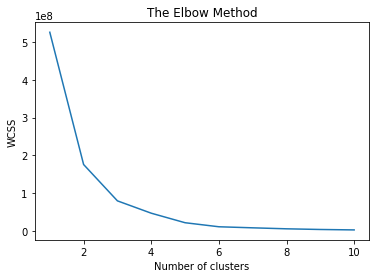

In [11]:
a = ['曝光人数','入店人数','下单人数']
kmeans(data,a)

In [12]:
b = [4,'曝光人数','入店人数','下单人数']
c = kmeans_(data,b)

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

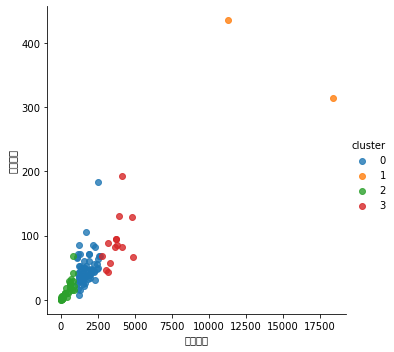

In [13]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x="曝光人数", y="入店人数",data=c,fit_reg=False,hue='cluster')

In [14]:
data.to_csv(r'C:\Users\Administrator\Datas\爱尚花语\艾尚月季度数据\6月份数据\2data/Mdata_kmeans.csv')